# Explore Data in order to create Data Quality Report
Yi-Hsin (Amy) Chung

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [2]:
mydata = pd.read_csv('NY property data.csv')
mydata.shape

(1070994, 32)

In [3]:
mydata.head(5)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [4]:
numrecords = len(mydata)
print(numrecords)

1070994


In [5]:
mydata.dtypes

RECORD        int64
BBLE         object
B             int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [6]:
# first 10 fields' summary
mydata.iloc[:,0:10].describe()

,RECORD,B,BLOCK,LOT,LTFRONT
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,5.354975e+05,3.215427e+00,4.757239e+03,3.647221e+02,3.663530e+01
std,3.091695e+05,1.201197e+00,3.676579e+03,8.532152e+02,7.403284e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.677492e+05,3.000000e+00,1.555000e+03,2.300000e+01,1.900000e+01
50%,5.354975e+05,3.000000e+00,4.047000e+03,4.900000e+01,2.500000e+01
75%,8.032458e+05,4.000000e+00,6.898000e+03,1.430000e+02,4.000000e+01
max,1.070994e+06,5.000000e+00,1.635000e+04,9.978000e+03,9.999000e+03


In [7]:
# 10~19 fields' summary
# set the format for the numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
mydata.iloc[:,10:20].describe()

,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1
count,1070994.00,1014730.00,1070994.00,1070994.00,1070994.00,1070994.00,1070994.00,638488.00
mean,88.86,5.01,874264.51,85067.92,227238.17,36423.89,91186.98,1602.01
std,76.40,8.37,11582430.99,4057260.06,6877529.31,3981575.79,6508402.82,1384.23
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1010.00
25%,80.00,2.00,304000.00,9180.00,18374.00,0.00,0.00,1017.00
50%,100.00,2.00,447000.00,13678.00,25340.00,1620.00,1620.00,1017.00
75%,100.00,3.00,619000.00,19740.00,45438.00,1620.00,2090.00,1017.00
max,9999.00,119.00,6150000000.00,2668500000.00,4668308947.00,2668500000.00,4668308947.00,7170.00


In [8]:
# 20~last fields' summary
mydata.iloc[:,20:].describe()

,ZIP,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2
count,1041104.00,1070994.00,1070994.00,282726.00,282732.00,87449.00,130828.00,92948.00
mean,10923.96,23.04,39.92,246235.72,713911.44,351235.68,656768.28,1364.04
std,528.42,35.58,42.71,6178962.56,11652528.95,10802212.67,16072510.17,1094.71
min,10001.00,0.00,0.00,3.00,3.00,1.00,7.00,1011.00
25%,10314.00,15.00,26.00,5705.00,33912.00,2090.00,2870.00,1017.00
50%,11214.00,20.00,39.00,20145.00,79962.50,3048.00,37062.00,1017.00
75%,11364.00,24.00,50.00,62640.00,240551.00,31779.00,106840.75,1017.00
max,33803.00,7575.00,9393.00,2371005000.00,4501180002.00,2371005000.00,4501180002.00,7160.00


In [9]:
# count how many records with values are there for each column
mydata.count()

RECORD      1070994
BBLE        1070994
B           1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

In [10]:
# Count the unique value of each field
field = list(mydata.columns)

for i in field:
    num = len(mydata[i].unique())
    print(f"#unique value of {i} : {num}")

#unique value of RECORD : 1070994
#unique value of BBLE : 1070994
#unique value of B : 5
#unique value of BLOCK : 13984
#unique value of LOT : 6366
#unique value of EASEMENT : 13
#unique value of OWNER : 863347
#unique value of BLDGCL : 200
#unique value of TAXCLASS : 11
#unique value of LTFRONT : 1297
#unique value of LTDEPTH : 1370
#unique value of EXT : 4
#unique value of STORIES : 112
#unique value of FULLVAL : 109324
#unique value of AVLAND : 70921
#unique value of AVTOT : 112914
#unique value of EXLAND : 33419
#unique value of EXTOT : 64255
#unique value of EXCD1 : 130
#unique value of STADDR : 839281
#unique value of ZIP : 197
#unique value of EXMPTCL : 15
#unique value of BLDFRONT : 612
#unique value of BLDDEPTH : 621
#unique value of AVLAND2 : 58592
#unique value of AVTOT2 : 111361
#unique value of EXLAND2 : 22196
#unique value of EXTOT2 : 48349
#unique value of EXCD2 : 61
#unique value of PERIOD : 1
#unique value of YEAR : 1
#unique value of VALTYPE : 1


In [11]:
# Count the number of records that is zero value for each field
for i in field:
    zero = len(mydata[mydata[i] == 0])
    print(f"#Zero value in {i} : {zero}")

#Zero value in RECORD : 0
#Zero value in BBLE : 0
#Zero value in B : 0
#Zero value in BLOCK : 0
#Zero value in LOT : 0
#Zero value in EASEMENT : 0
#Zero value in OWNER : 0
#Zero value in BLDGCL : 0
#Zero value in TAXCLASS : 0
#Zero value in LTFRONT : 169108
#Zero value in LTDEPTH : 170128
#Zero value in EXT : 0
#Zero value in STORIES : 0
#Zero value in FULLVAL : 13007
#Zero value in AVLAND : 13009
#Zero value in AVTOT : 13007
#Zero value in EXLAND : 491699
#Zero value in EXTOT : 432572
#Zero value in EXCD1 : 0
#Zero value in STADDR : 0
#Zero value in ZIP : 0
#Zero value in EXMPTCL : 0
#Zero value in BLDFRONT : 228815
#Zero value in BLDDEPTH : 228853
#Zero value in AVLAND2 : 0
#Zero value in AVTOT2 : 0
#Zero value in EXLAND2 : 0
#Zero value in EXTOT2 : 0
#Zero value in EXCD2 : 0
#Zero value in PERIOD : 0
#Zero value in YEAR : 0
#Zero value in VALTYPE : 0


In [12]:
# Most common value of each field
for i in field:
    max_count = mydata[i].value_counts().head(1)
    f_name = max_count.keys().to_list()
    frequency = max_count.to_list()
    print(f"Most common value of {i}: {f_name}; frequency: {frequency}")

Most common value of RECORD: [2047]; frequency: [1]
Most common value of BBLE: ['5062380046']; frequency: [1]
Most common value of B: [4]; frequency: [358046]
Most common value of BLOCK: [3944]; frequency: [3888]
Most common value of LOT: [1]; frequency: [24367]
Most common value of EASEMENT: ['E']; frequency: [4148]
Most common value of OWNER: ['PARKCHESTER PRESERVAT']; frequency: [6020]
Most common value of BLDGCL: ['R4']; frequency: [139879]
Most common value of TAXCLASS: ['1']; frequency: [660721]
Most common value of LTFRONT: [0]; frequency: [169108]
Most common value of LTDEPTH: [100]; frequency: [464541]
Most common value of EXT: ['G']; frequency: [266970]
Most common value of STORIES: [2.0]; frequency: [415092]
Most common value of FULLVAL: [0.0]; frequency: [13007]
Most common value of AVLAND: [0.0]; frequency: [13009]
Most common value of AVTOT: [0.0]; frequency: [13007]
Most common value of EXLAND: [0.0]; frequency: [491699]
Most common value of EXTOT: [0.0]; frequency: [432

## Create a Graph for each column

In [13]:
field

['RECORD',
 'BBLE',
 'B',
 'BLOCK',
 'LOT',
 'EASEMENT',
 'OWNER',
 'BLDGCL',
 'TAXCLASS',
 'LTFRONT',
 'LTDEPTH',
 'EXT',
 'STORIES',
 'FULLVAL',
 'AVLAND',
 'AVTOT',
 'EXLAND',
 'EXTOT',
 'EXCD1',
 'STADDR',
 'ZIP',
 'EXMPTCL',
 'BLDFRONT',
 'BLDDEPTH',
 'AVLAND2',
 'AVTOT2',
 'EXLAND2',
 'EXTOT2',
 'EXCD2',
 'PERIOD',
 'YEAR',
 'VALTYPE']

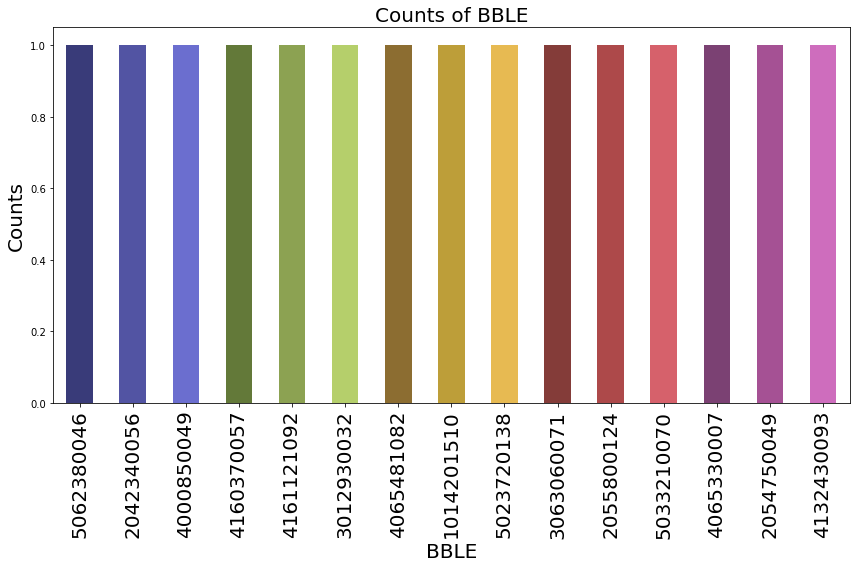

In [14]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['BBLE'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of BBLE", fontsize=20)
plt.xlabel("BBLE", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.savefig("BBLE.png")
plt.show()

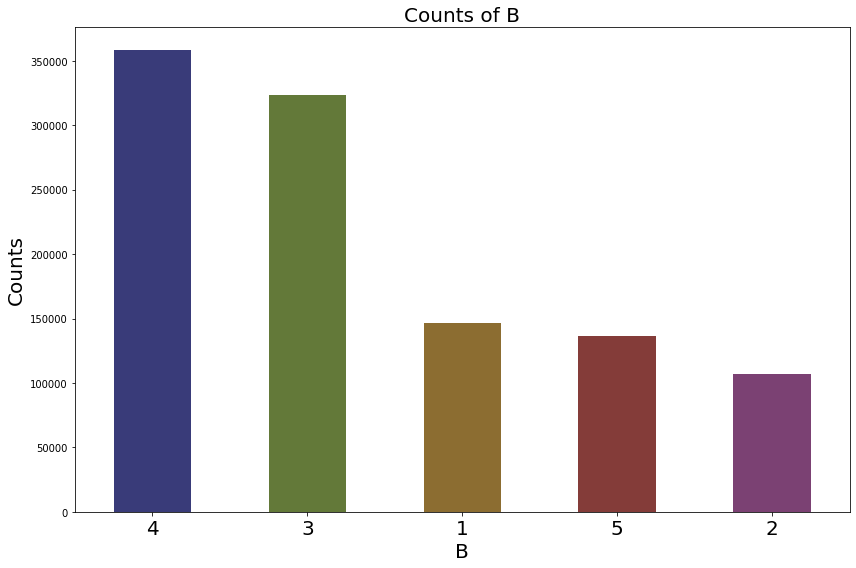

In [15]:
# specify the color using color map
colors = []
for i in np.arange(5):
    c = cm.tab20b(i/5.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['B'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of B", fontsize=20)
plt.xlabel("B", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.savefig("Boro.png")
plt.show()


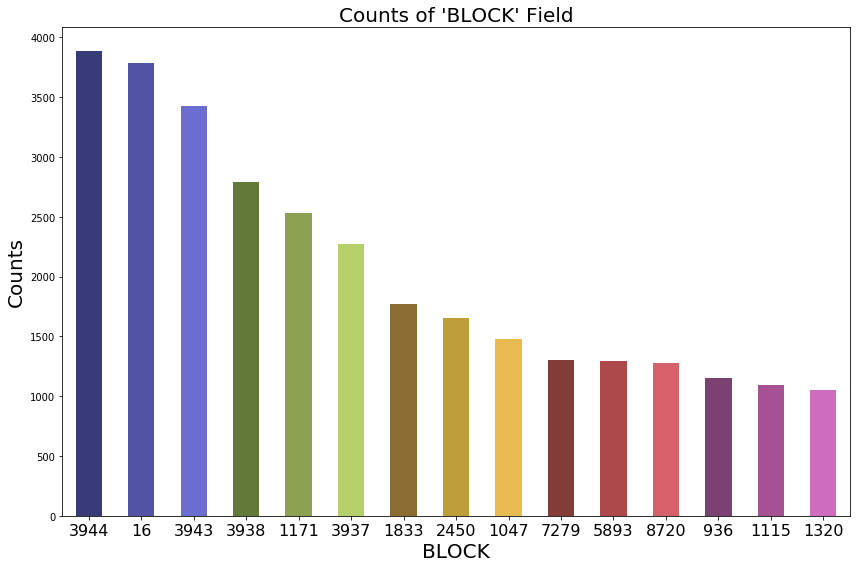

In [16]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['BLOCK'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'BLOCK' Field", fontsize=20)
plt.xlabel("BLOCK", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.savefig("Block.png")
plt.show()



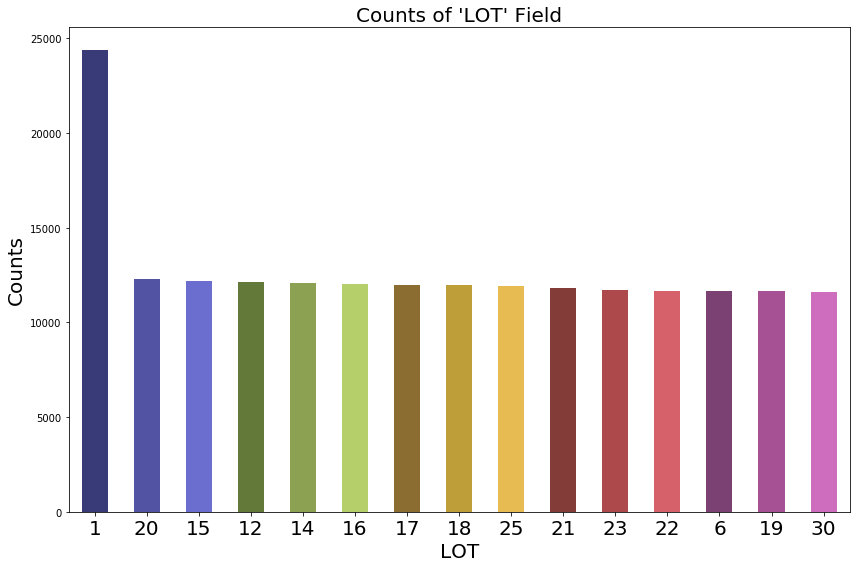

In [17]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['LOT'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'LOT' Field", fontsize=20)
plt.xlabel("LOT", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.savefig("LOT.png")
plt.show()

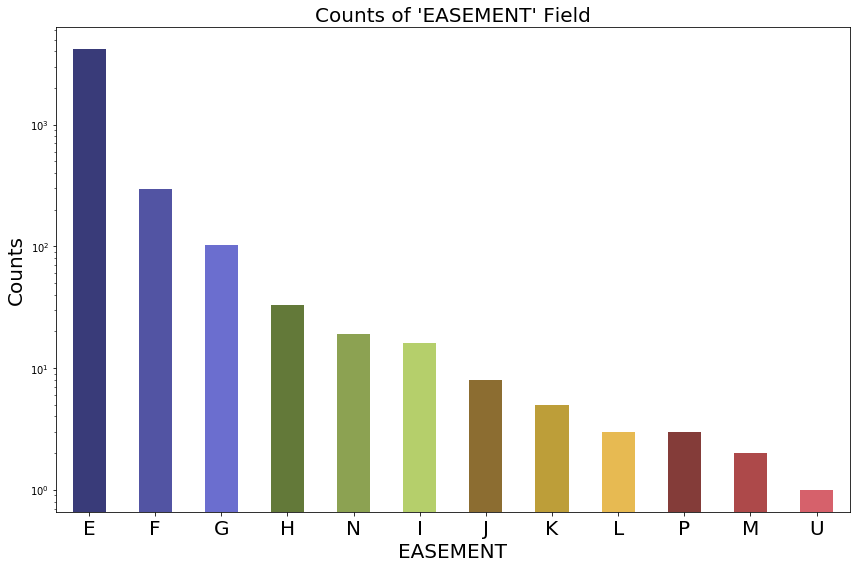

In [18]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['EASEMENT'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'EASEMENT' Field", fontsize=20)
plt.xlabel("EASEMENT", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.yscale('log')
plt.xticks(rotation=0, fontsize=20)
plt.savefig("Easement.png")
plt.show()

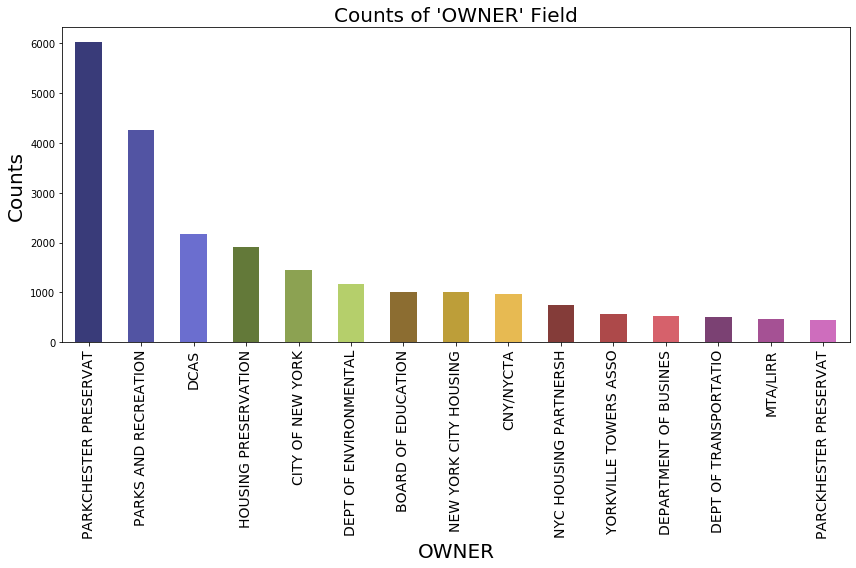

In [19]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['OWNER'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'OWNER' Field", size=20)
plt.xlabel("OWNER", fontsize=20)
plt.ylabel("Counts", fontsize=20)
#plt.yscale('log')
plt.xticks(rotation=90, fontsize=14)
plt.savefig("OWNER.png")
plt.show()

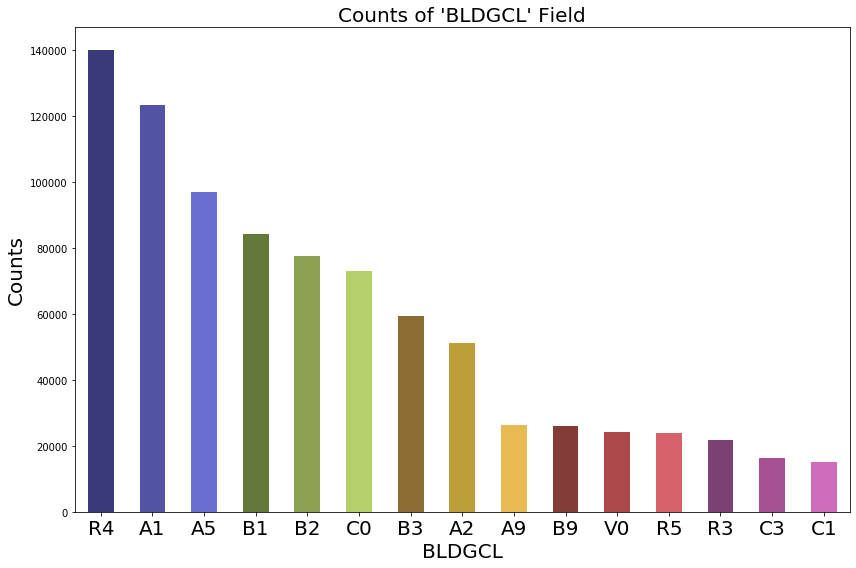

In [20]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['BLDGCL'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'BLDGCL' Field", size=20)
plt.xlabel("BLDGCL",fontsize=20)
plt.ylabel("Counts", fontsize=20)
#plt.yscale('log')
plt.xticks(rotation=0, fontsize=20)
plt.savefig("BLDGCL.png")
plt.show()

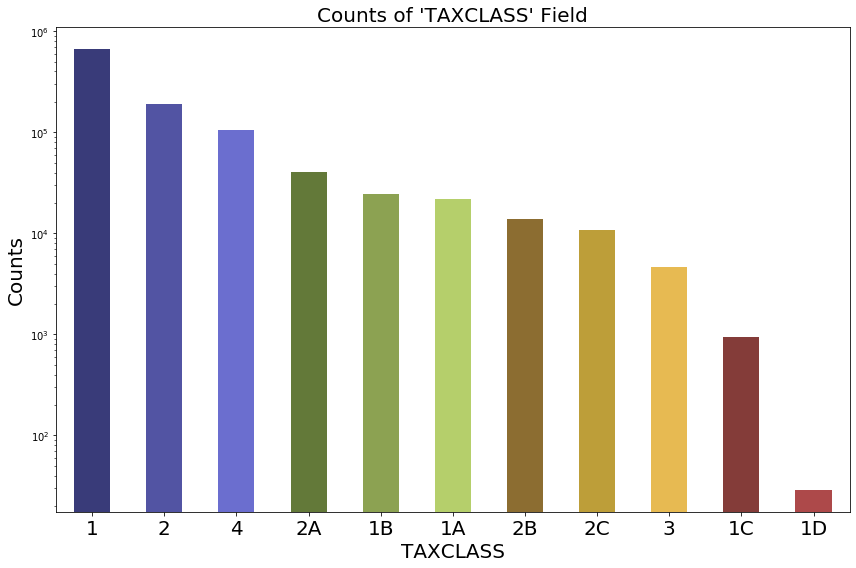

In [21]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['TAXCLASS'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'TAXCLASS' Field", size=20)
plt.xlabel("TAXCLASS", fontsize=20)
plt.ylabel("Counts", size=20)
plt.yscale('log')
plt.xticks(rotation=0, size=20)
plt.savefig("TAXCLASS.png")
plt.show()

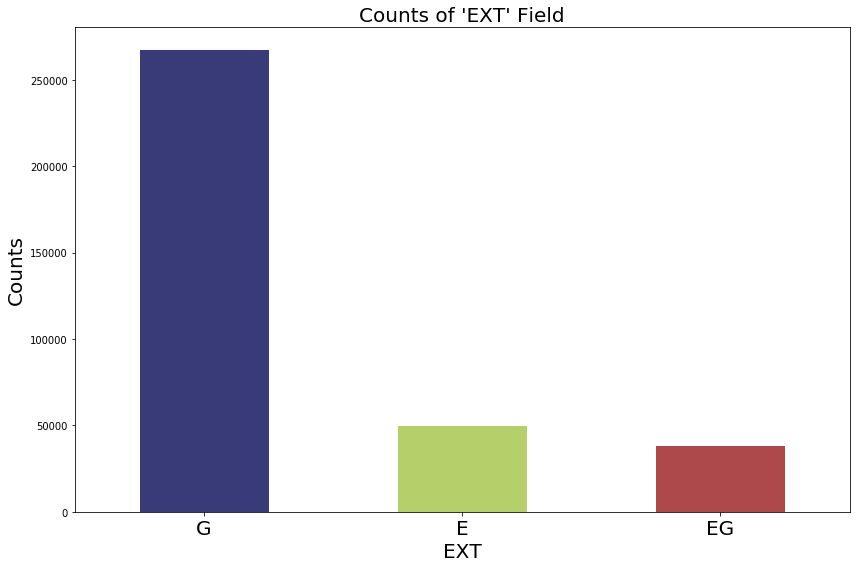

In [22]:
# specify the color using color map
colors = []
for i in np.arange(3):
    c = cm.tab20b(i/3.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['EXT'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'EXT' Field", size=20)
plt.xlabel("EXT", size=20)
plt.ylabel("Counts", size=20)
#plt.yscale('log')
plt.xticks(rotation=0, size=20)
plt.savefig("EXT.png")
plt.show()

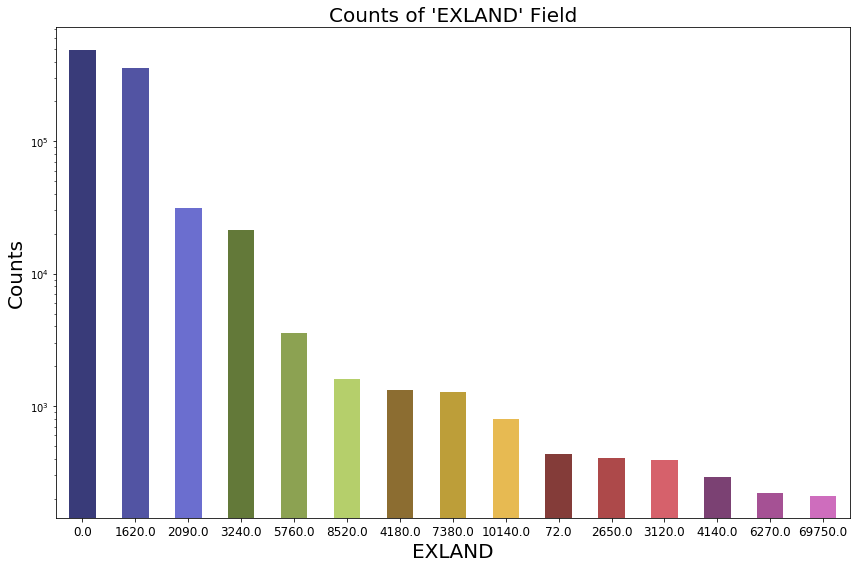

In [23]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['EXLAND'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'EXLAND' Field", size=20)
plt.xlabel("EXLAND", size=20)
plt.ylabel("Counts", size=20)
plt.yscale('log')
plt.xticks(rotation=0, size=12)
plt.savefig("EXLAND.png")
plt.show()

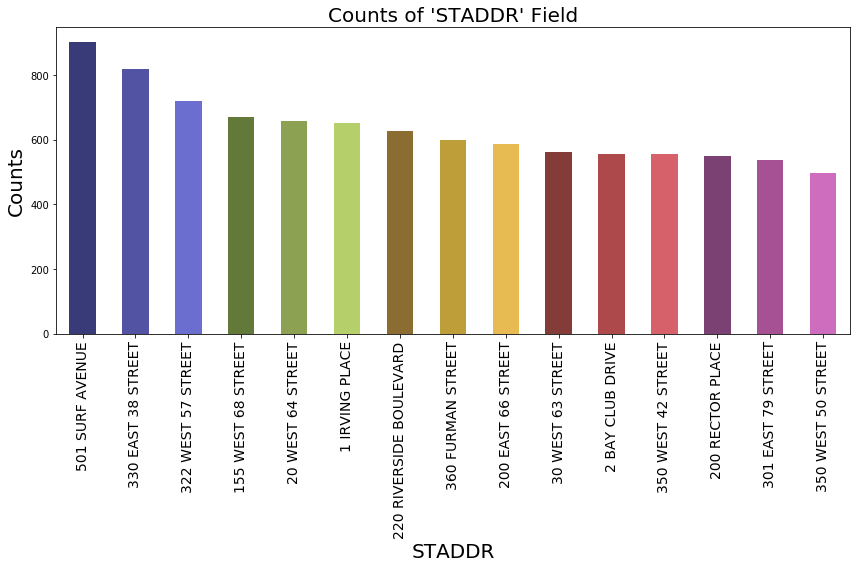

In [24]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['STADDR'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'STADDR' Field", size=20)
plt.xlabel("STADDR", size=20)
plt.ylabel("Counts", size=20)
#plt.yscale('log')
plt.xticks(rotation=90, size=14)
plt.savefig("STADDR.png")
plt.show()

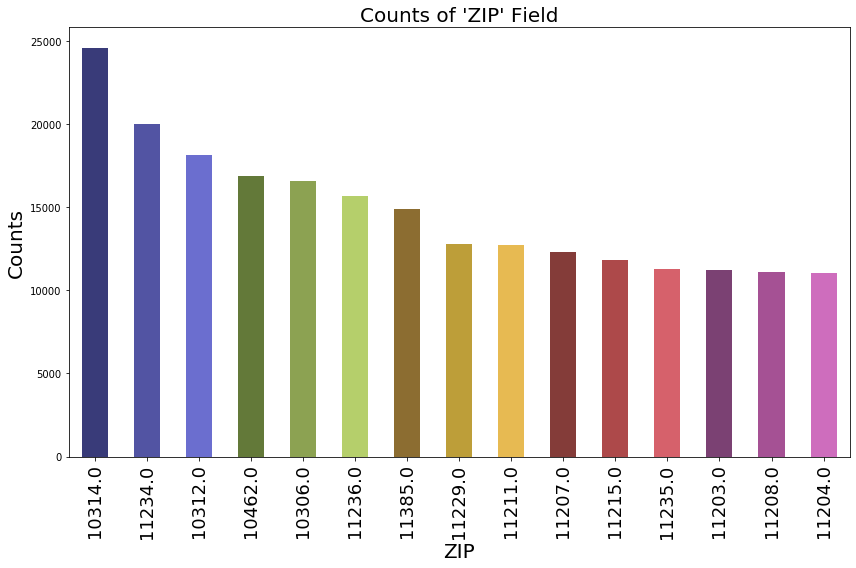

In [25]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['ZIP'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'ZIP' Field", size=20)
plt.xlabel("ZIP", size=20)
plt.ylabel("Counts", size=20)
#plt.yscale('log')
plt.xticks(rotation=90, size=18)
plt.savefig("ZIP.png")
plt.show()

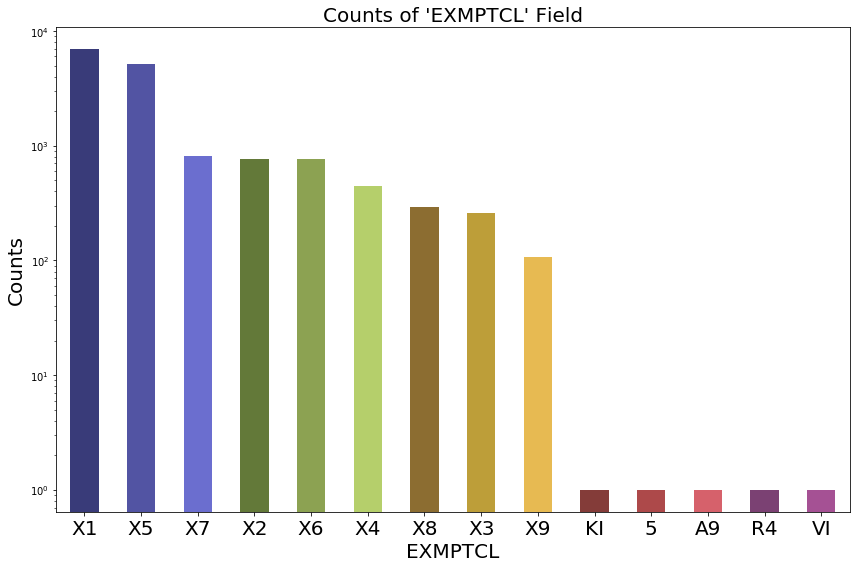

In [26]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['EXMPTCL'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'EXMPTCL' Field", size=20)
plt.xlabel("EXMPTCL", size=20)
plt.ylabel("Counts", size=20)
plt.yscale('log')
plt.xticks(rotation=0, size=20)
plt.savefig("EXMPTCL.png")
plt.show()

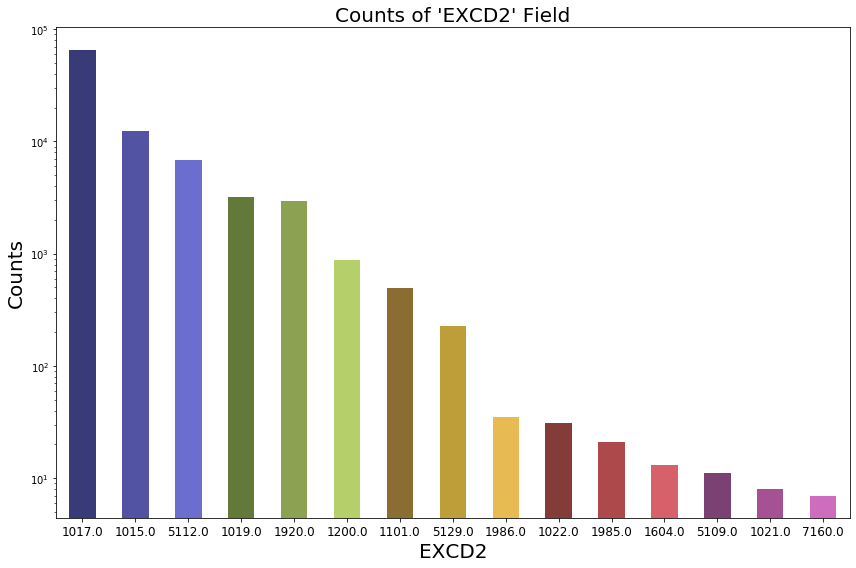

In [27]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['EXCD2'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'EXCD2' Field", size=20)
plt.xlabel("EXCD2", size=20)
plt.ylabel("Counts", size=20)
plt.yscale('log')
plt.xticks(rotation=0, size=12)
plt.savefig("EXCD2.png")
plt.show()

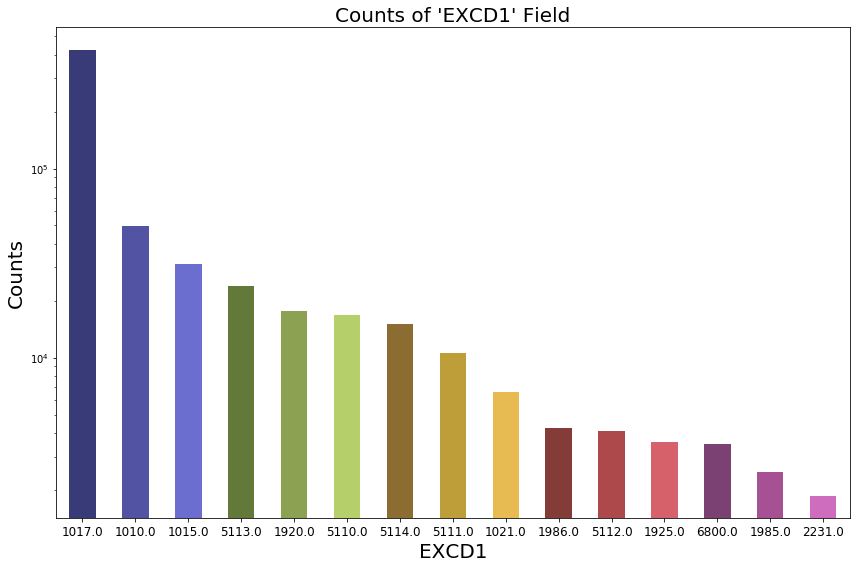

In [28]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['EXCD1'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'EXCD1' Field", size=20)
plt.xlabel("EXCD1", size=20)
plt.ylabel("Counts", size=20)
plt.yscale('log')
plt.xticks(rotation=0, size=12)
plt.savefig("EXCD1.png")
plt.show()

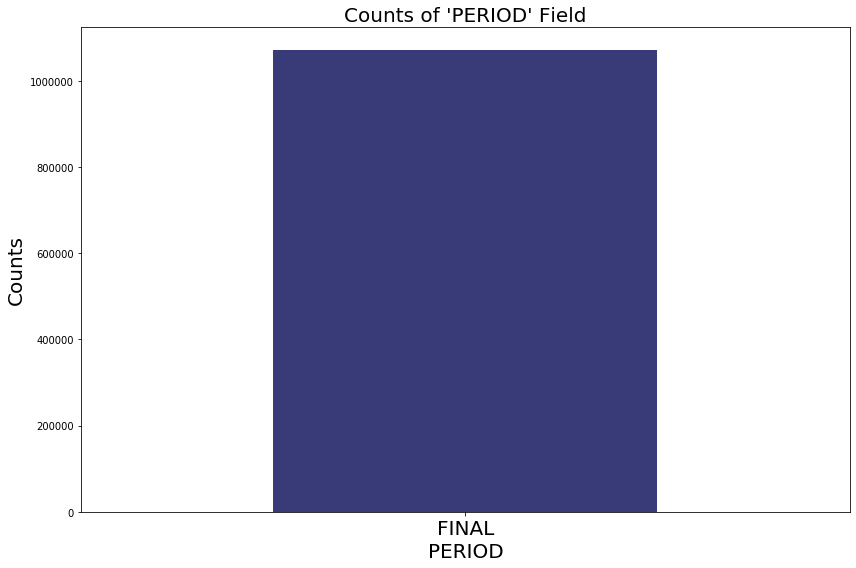

In [29]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['PERIOD'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'PERIOD' Field", size=20)
plt.xlabel("PERIOD", size=20)
plt.ylabel("Counts", size=20)
#plt.yscale('log')
plt.xticks(rotation=0, size=20)
plt.savefig("PERIOD.png")
plt.show()

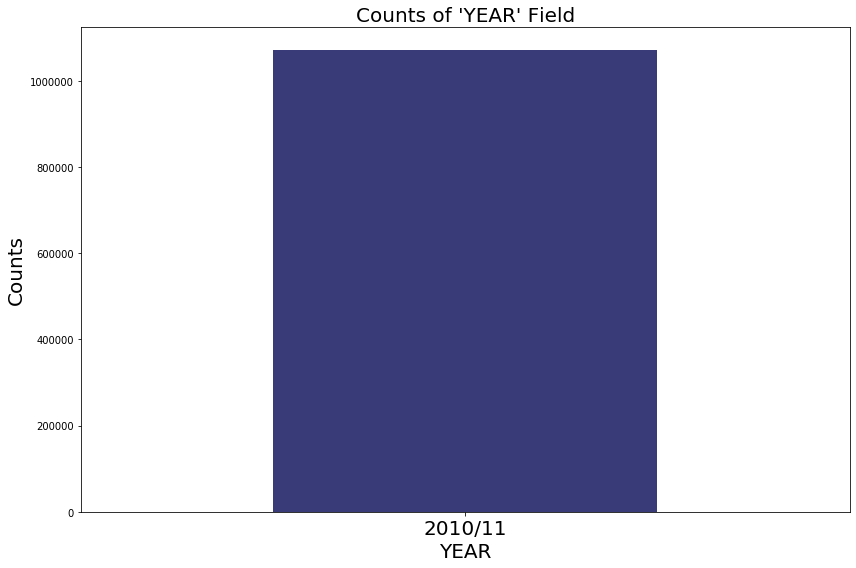

In [30]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['YEAR'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'YEAR' Field", size=20)
plt.xlabel("YEAR", size=20)
plt.ylabel("Counts", size=20)
#plt.yscale('log')
plt.xticks(rotation=0, size=20)
plt.savefig("YEAR.png")
plt.show()

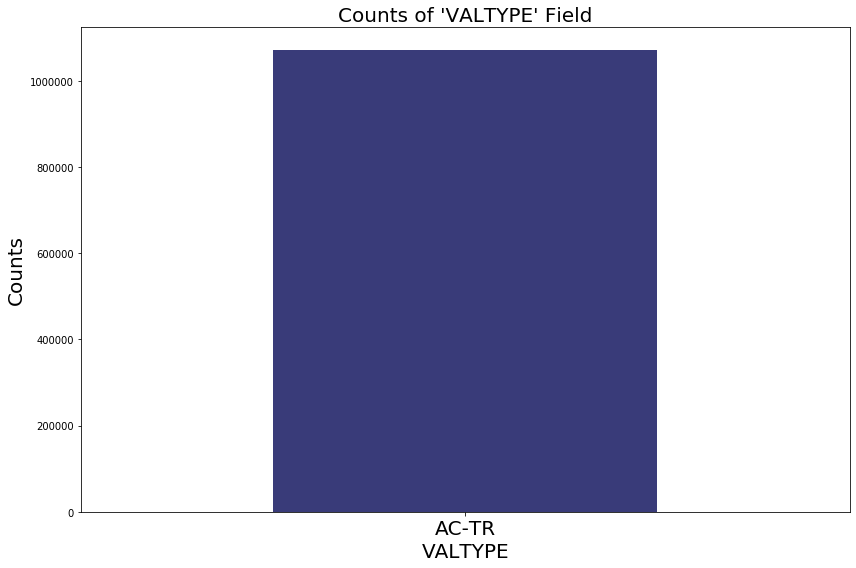

In [31]:
# specify the color using color map
colors = []
for i in np.arange(15):
    c = cm.tab20b(i/15.,1)
    colors.append(c)

# set the figsize and autolayout
plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'figure.autolayout': True})

plt.figure(3)

mydata['VALTYPE'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Counts of 'VALTYPE' Field", size=20)
plt.xlabel("VALTYPE", size=20)
plt.ylabel("Counts", size=20)
#plt.yscale('log')
plt.xticks(rotation=0, size=20)
plt.savefig("VALTYPE.png")
plt.show()

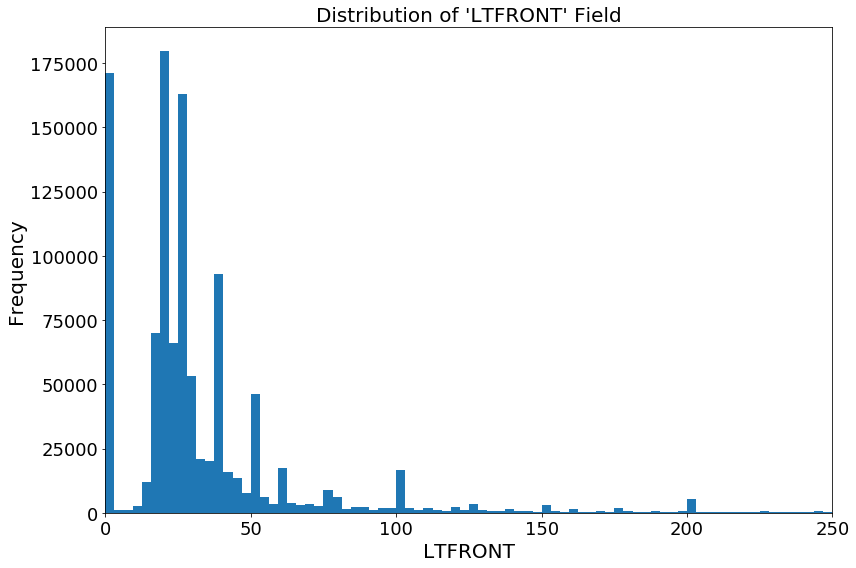

In [32]:
xhigh = 250
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['LTFRONT'] <= xhigh]
plt.hist(temp["LTFRONT"], bins = 80)

plt.title("Distribution of 'LTFRONT' Field", fontsize=20)
plt.xlabel("LTFRONT", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("LTFRONT.png")

plt.show()

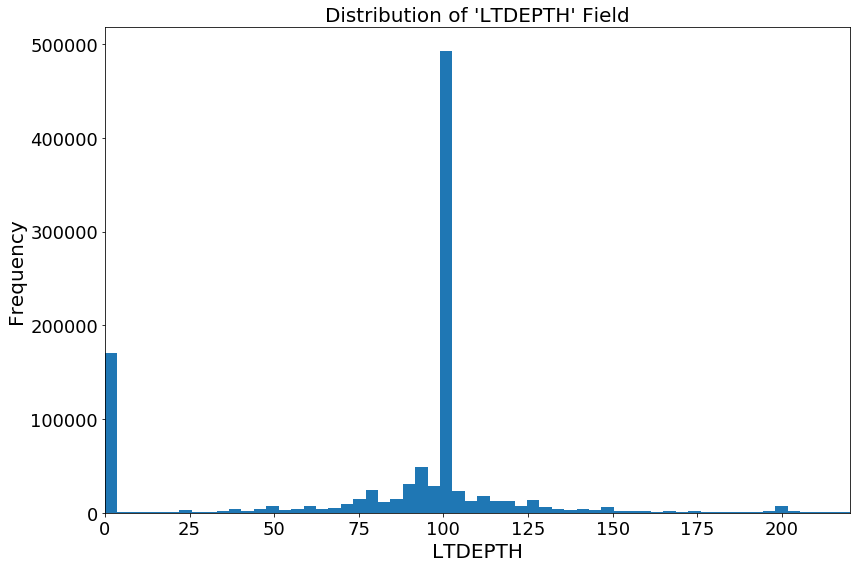

In [33]:
xhigh = 220
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['LTDEPTH'] <= xhigh]
plt.hist(temp["LTDEPTH"], bins = 60)

plt.title("Distribution of 'LTDEPTH' Field", fontsize=20)
plt.xlabel("LTDEPTH", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('log')
plt.savefig("LTDEPTH.png")

plt.show()

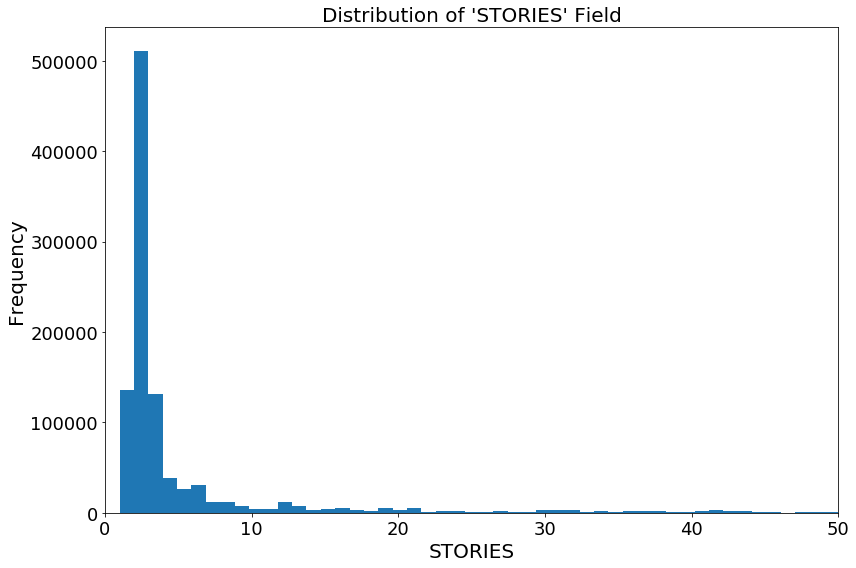

In [34]:
xhigh = 50
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['STORIES'] <= xhigh]
plt.hist(temp["STORIES"], bins = 50)

plt.title("Distribution of 'STORIES' Field", fontsize=20)
plt.xlabel("STORIES", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yscale('log')
plt.savefig("STORIES.png")

plt.show()

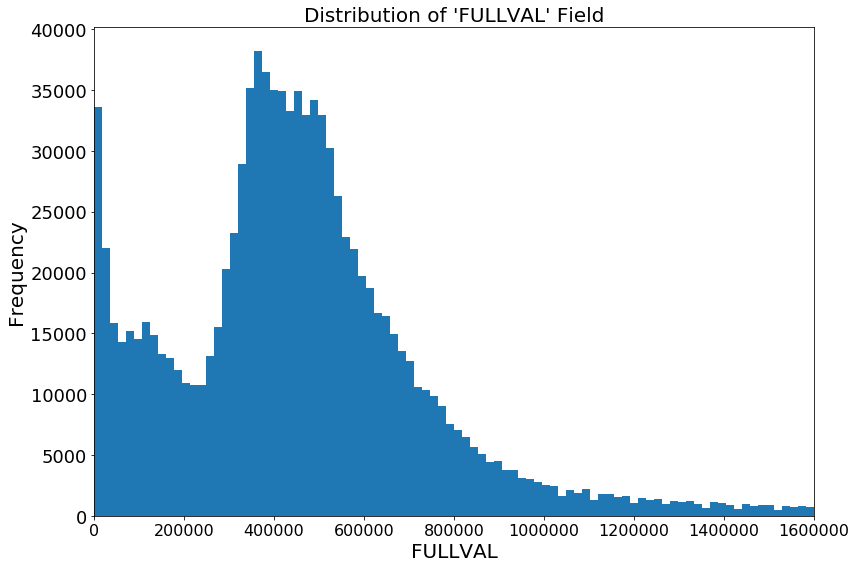

In [35]:
xhigh = 1600000
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['FULLVAL'] <= xhigh]
plt.hist(temp["FULLVAL"], bins = 90)

plt.title("Distribution of 'FULLVAL' Field", fontsize=20)
plt.xlabel("FULLVAL", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
#plt.yscale('log')
plt.savefig("FULLVAL.png")

plt.show()

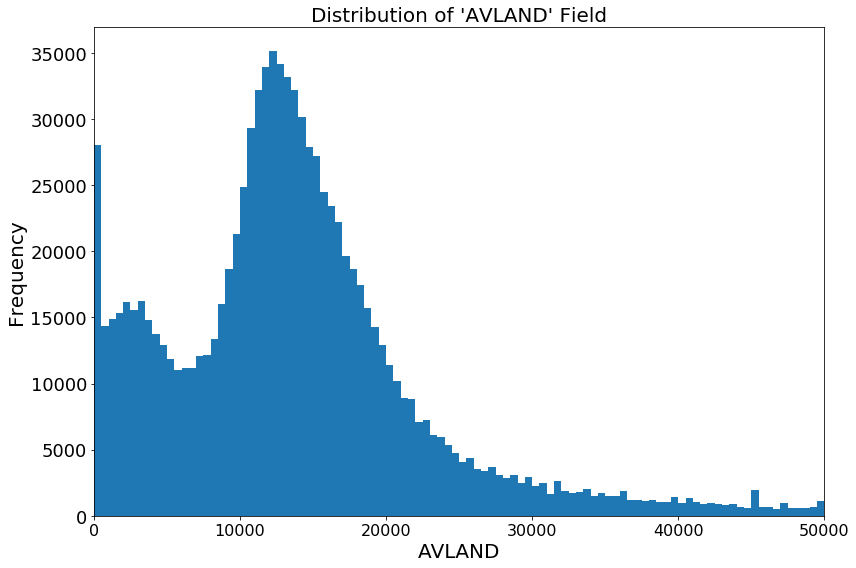

In [36]:
xhigh = 50000
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['AVLAND'] <= xhigh]
plt.hist(temp["AVLAND"], bins = 100)

plt.title("Distribution of 'AVLAND' Field", fontsize=20)
plt.xlabel("AVLAND", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
#plt.yscale('log')
plt.savefig("AVLAND.png")

plt.show()

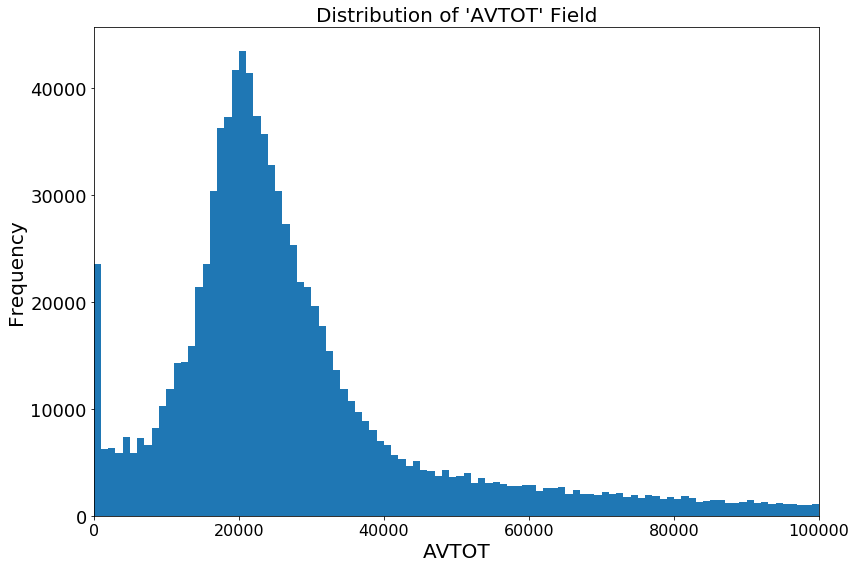

In [37]:
xhigh = 100000
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['AVTOT'] <= xhigh]
plt.hist(temp["AVTOT"], bins = 100)

plt.title("Distribution of 'AVTOT' Field", fontsize=20)
plt.xlabel("AVTOT", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
#plt.yscale('log')
plt.savefig("AVTOT.png")

plt.show()

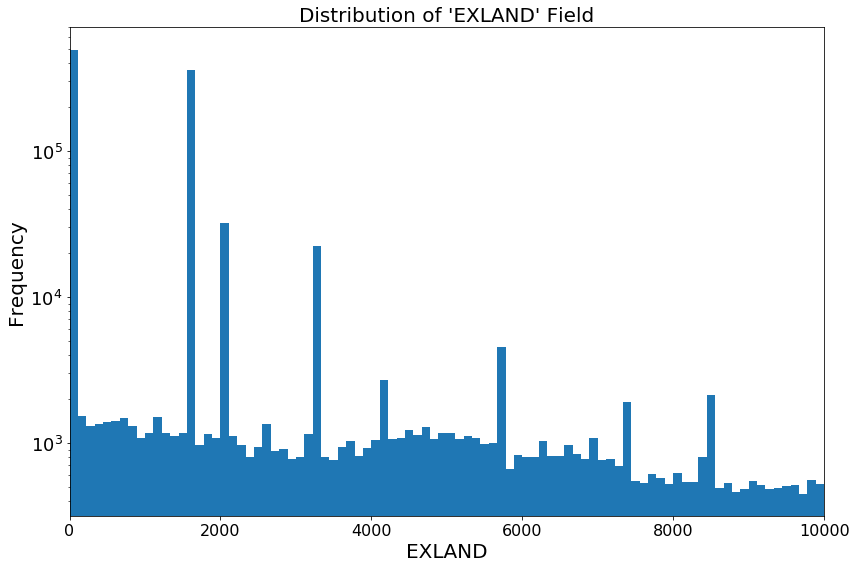

In [38]:
xhigh = 10000
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['EXLAND'] <= xhigh]
plt.hist(temp["EXLAND"], bins = 90)

plt.title("Distribution of 'EXLAND' Field", fontsize=20)
plt.xlabel("EXLAND", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
plt.savefig("exland.png")

plt.show()

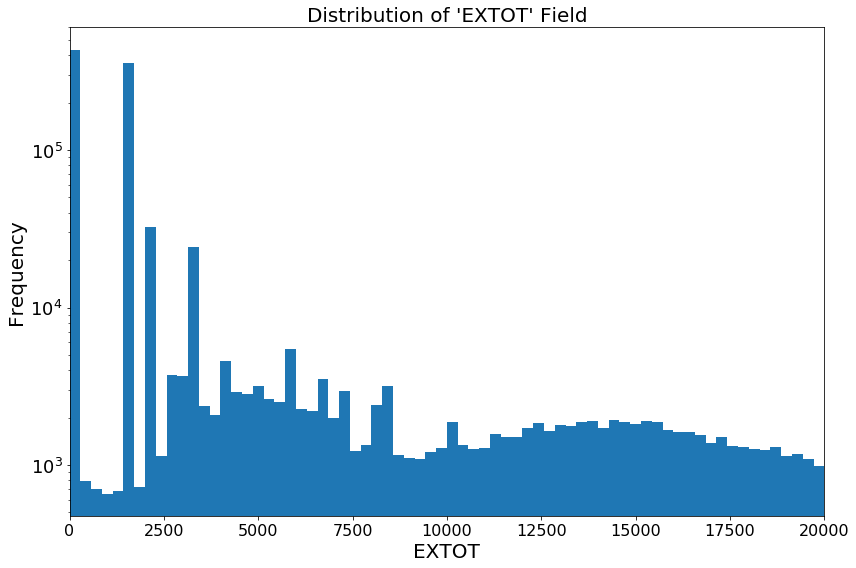

In [39]:
xhigh = 20000
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['EXTOT'] <= xhigh]
plt.hist(temp["EXTOT"], bins = 70)

plt.title("Distribution of 'EXTOT' Field", fontsize=20)
plt.xlabel("EXTOT", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
plt.savefig("EXTOT.png")

plt.show()

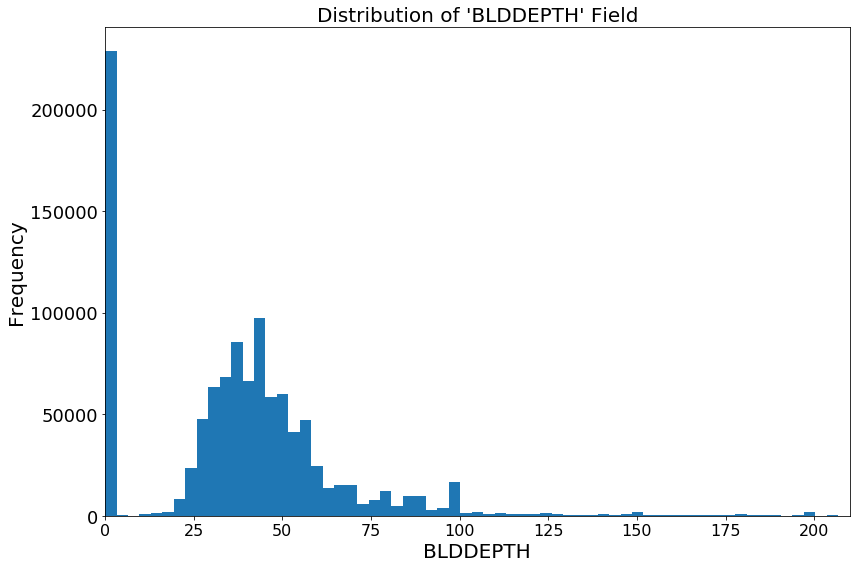

In [40]:
xhigh = 210
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['BLDDEPTH'] <= xhigh]
plt.hist(temp["BLDDEPTH"], bins = 65)

plt.title("Distribution of 'BLDDEPTH' Field", fontsize=20)
plt.xlabel("BLDDEPTH", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
#plt.yscale('log')
plt.savefig("BLDDEPTH.png")

plt.show()

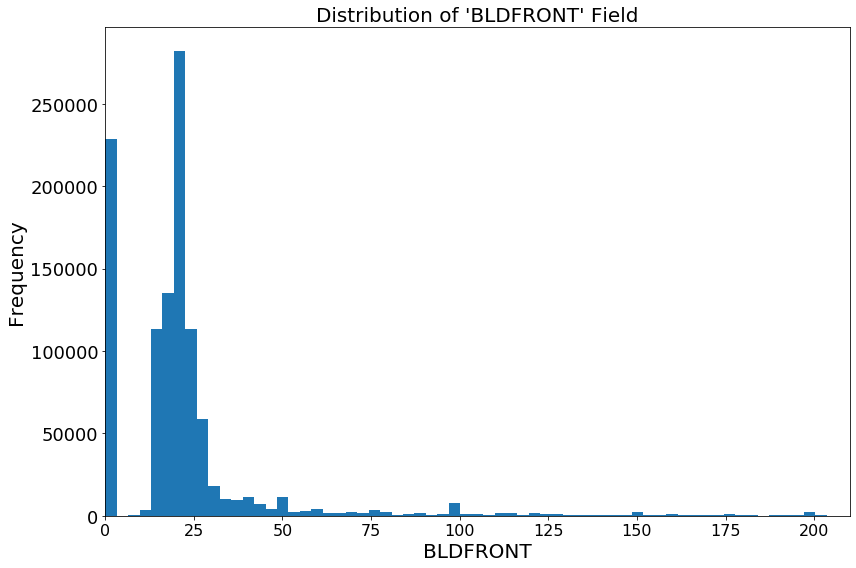

In [41]:
xhigh = 210
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['BLDFRONT'] <= xhigh]
plt.hist(temp["BLDFRONT"], bins = 65)

plt.title("Distribution of 'BLDFRONT' Field", fontsize=20)
plt.xlabel("BLDFRONT", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
#plt.yscale('log')
plt.savefig("BLDFRONT.png")

plt.show()

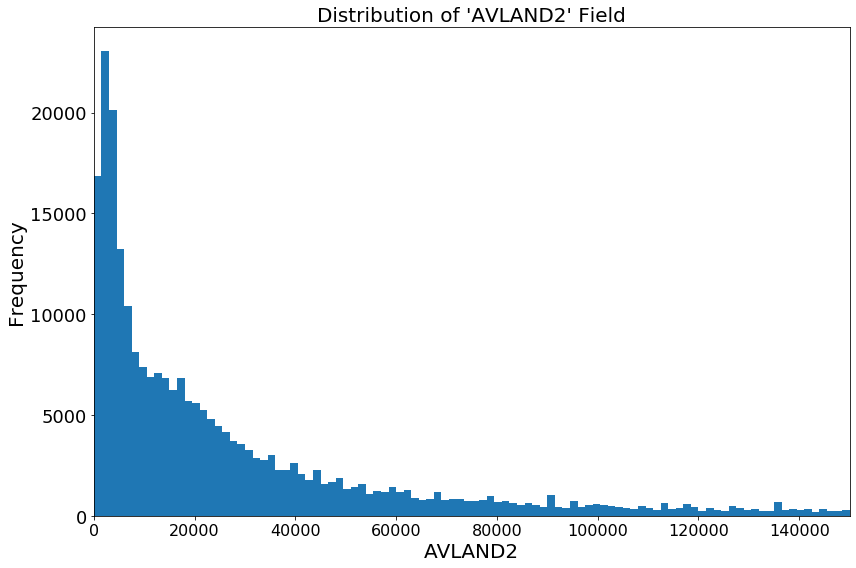

In [42]:
xhigh = 150000
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['AVLAND2'] <= xhigh]
plt.hist(temp["AVLAND2"], bins =100)

plt.title("Distribution of 'AVLAND2' Field", fontsize=20)
plt.xlabel("AVLAND2", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
#plt.yscale('log')
plt.savefig("AVLAND2.png")

plt.show()

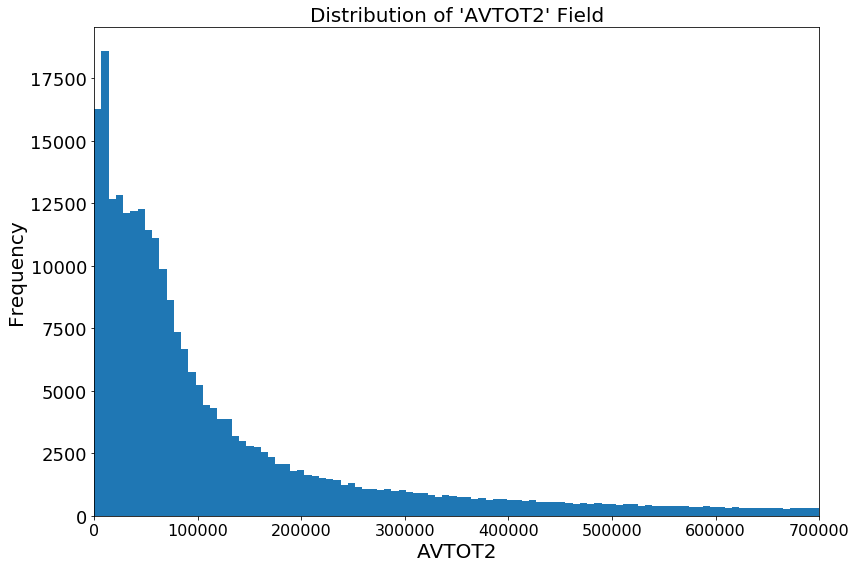

In [43]:
xhigh = 700000
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['AVTOT2'] <= xhigh]
plt.hist(temp["AVTOT2"], bins =100)

plt.title("Distribution of 'AVTOT2' Field", fontsize=20)
plt.xlabel("AVTOT2", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
#plt.yscale('log')
plt.savefig("AVTOT2.png")

plt.show()

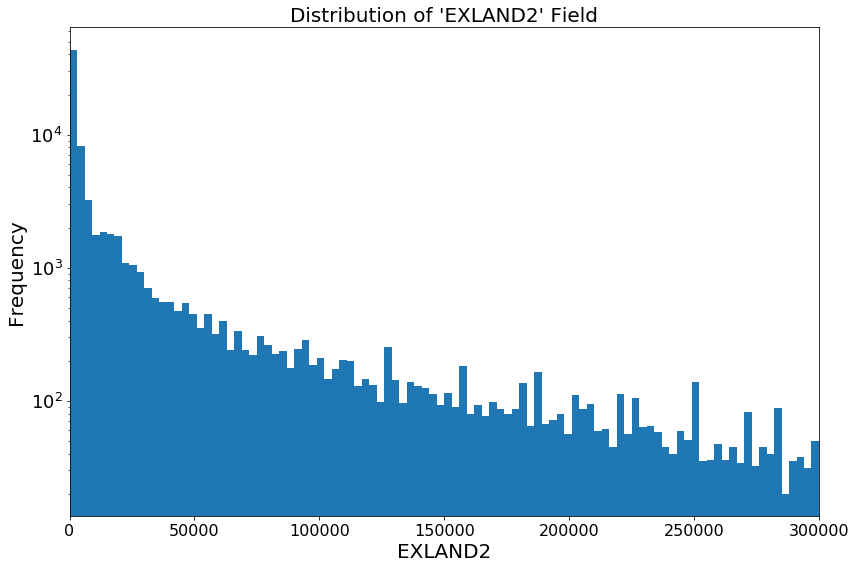

In [44]:
xhigh = 300000
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['EXLAND2'] <= xhigh]
plt.hist(temp["EXLAND2"], bins = 100)

plt.title("Distribution of 'EXLAND2' Field", fontsize=20)
plt.xlabel("EXLAND2", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
plt.savefig("EXLAND2.png")

plt.show()

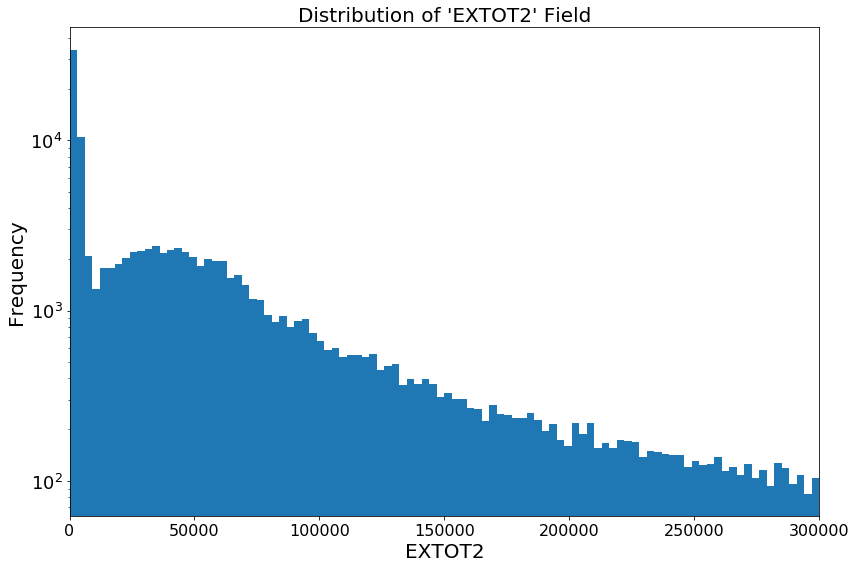

In [45]:
xhigh = 300000
plt.figure(1)

plt.xlim(0,xhigh)
temp = mydata[mydata['EXTOT2'] <= xhigh]
plt.hist(temp["EXTOT2"], bins = 100)

plt.title("Distribution of 'EXTOT2' Field", fontsize=20)
plt.xlabel("EXTOT2", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
plt.savefig("EXTOT2.png")

plt.show()